In [2]:
import model, utils
import torch.optim as optim
from torchvision import datasets

In [3]:
x = y = 28
mean = 0.1307 # TODO add function which calculates these three lines
std = 0.3081
batch_size = 256

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [4]:
device = utils.get_device()
cnn_model = utils.send_model_to_device(model.Net, device)

train_transforms = utils.get_transforms_for_train_data(x, y, mean, std)
test_transforms = utils.get_transforms_for_test_data(mean, std)

CUDA Available? False


/home/vmistry/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


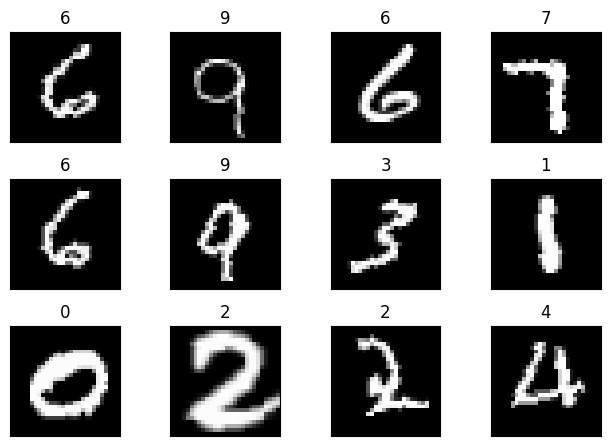

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = utils.get_loader(train_data, batch_size)
test_loader = utils.get_loader(test_data, batch_size)

batch_data, batch_label = next(iter(train_loader)) 
utils.plot_dataset_images(batch_data, batch_label)

In [6]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [8]:
utils.run_for_epoch(10, cnn_model, device, train_loader, test_loader, optimizer, scheduler, train_acc, train_losses, test_acc, test_losses)
utils.get_model_summary(cnn_model, device, x, y)

Epoch 1


Train: Loss=0.1012 Batch_id=234 Accuracy=72.98: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:51<00:00,  2.11it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.1082, Accuracy: 9654/10000 (96.54%)

Epoch 2


Train: Loss=0.0610 Batch_id=234 Accuracy=96.28: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:49<00:00,  2.15it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Test set: Average loss: 0.0600, Accuracy: 9814/10000 (98.14%)

Epoch 3


Train: Loss=0.0470 Batch_id=234 Accuracy=97.51: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:48<00:00,  2.16it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Test set: Average loss: 0.0450, Accuracy: 9861/10000 (98.61%)

Epoch 4


Train: Loss=0.0769 Batch_id=234 Accuracy=97.81: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:49<00:00,  2.15it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Test set: Average loss: 0.0391, Accuracy: 9882/10000 (98.82%)

Epoch 5


Train: Loss=0.0378 Batch_id=234 Accuracy=98.03: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:54<00:00,  2.06it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Test set: Average loss: 0.0333, Accuracy: 9895/10000 (98.95%)

Epoch 6


Train: Loss=0.0334 Batch_id=234 Accuracy=98.31: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:52<00:00,  2.08it/s]

Adjusting learning rate of group 0 to 1.2500e-03.


Test set: Average loss: 0.0310, Accuracy: 9903/10000 (99.03%)

Epoch 7


Train: Loss=0.0897 Batch_id=234 Accuracy=98.44: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:51<00:00,  2.10it/s]

Adjusting learning rate of group 0 to 1.2500e-03.


Test set: Average loss: 0.0308, Accuracy: 9901/10000 (99.01%)

Epoch 8


Train: Loss=0.0883 Batch_id=234 Accuracy=98.50: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:52<00:00,  2.08it/s]

Adjusting learning rate of group 0 to 6.2500e-04.


Test set: Average loss: 0.0296, Accuracy: 9909/10000 (99.09%)

Epoch 9


Train: Loss=0.1156 Batch_id=234 Accuracy=98.55: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:54<00:00,  2.05it/s]

Adjusting learning rate of group 0 to 6.2500e-04.


Test set: Average loss: 0.0287, Accuracy: 9907/10000 (99.07%)

Epoch 10


Train: Loss=0.0625 Batch_id=234 Accuracy=98.56: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [01:53<00:00,  2.07it/s]

Adjusting learning rate of group 0 to 3.1250e-04.


Test set: Average loss: 0.0287, Accuracy: 9903/10000 (99.03%)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


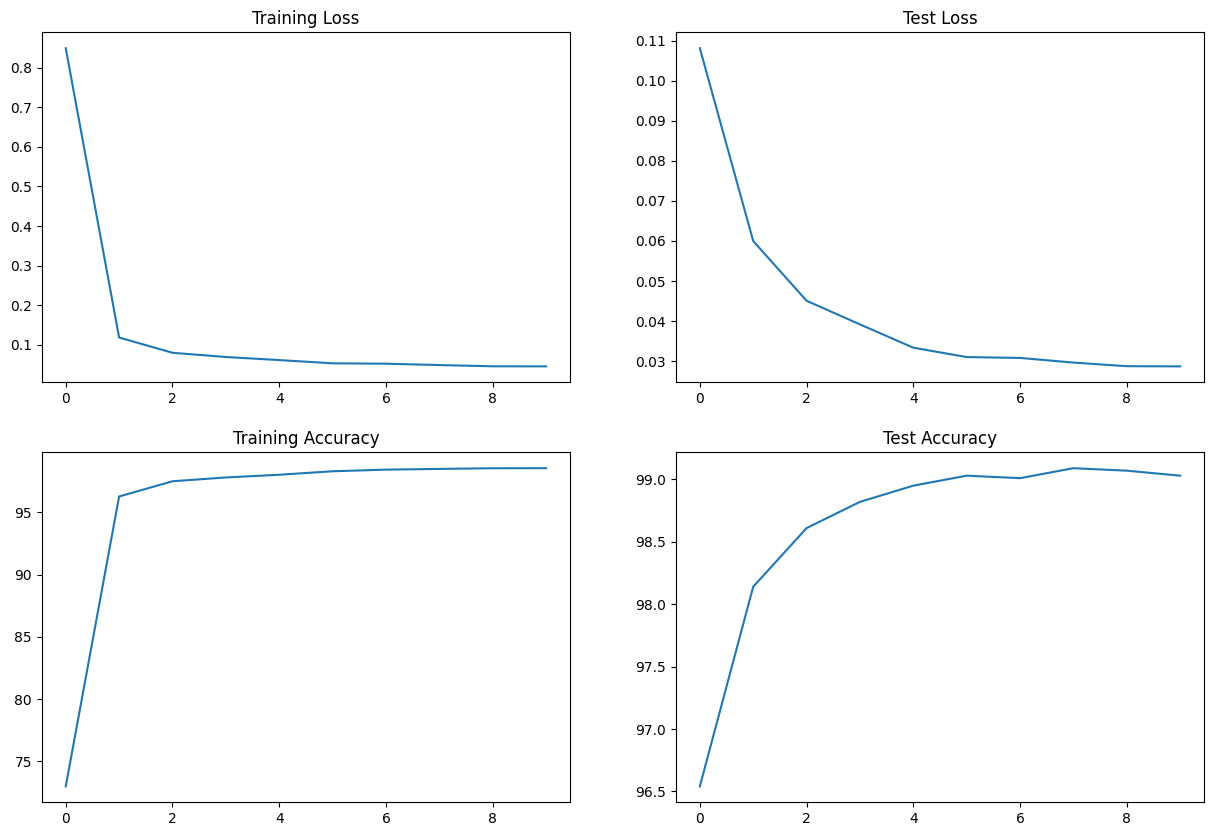

In [9]:
utils.plot_loss_accuracy_graph(train_losses, train_acc, test_losses, test_acc)